In [2]:
import numpy as np
import matplotlib.pyplot as plt


LINEAR REGRESSION

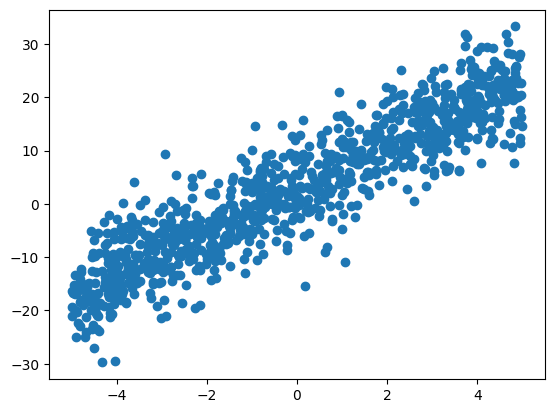

In [4]:
#generate random data
n=1000
X=10*np.random.random(n)-5
Y=4*X+3+np.random.normal(0,5,n)
plt.figure()
plt.scatter(X,Y)

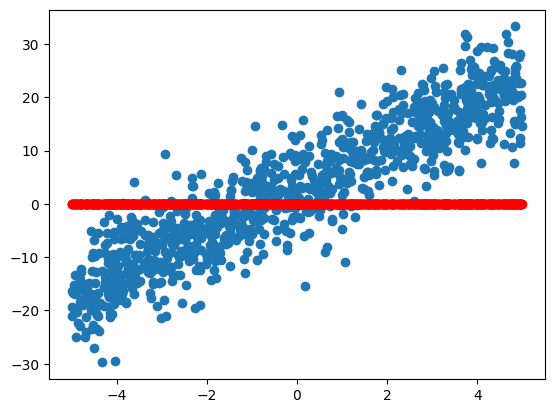

In [5]:
def Y_based_on_X(x,a,b):
    return a*x+b
#Gradient descent
a,b=0,0
l=0.01
plt.figure()
plt.scatter(X,Y)
plt.scatter(X,Y_based_on_X(X,a,b),c='red')

In [6]:
#gradient descent
def regression(a,b,rate,n):
  cost_list=[]
  for i in range(n):
    z=Y_based_on_X(X,a,b)
    cf=(1/n)*np.sum((z-Y)**2)  #cost func
    cost_list.append(cf)
    grad_a=(2/n)*np.dot(X.T,(z-Y))
    grad_b=(2/n)*np.sum(z-Y)
    a=a-rate*grad_a
    b=b-rate*grad_b

  return a,b,cost_list

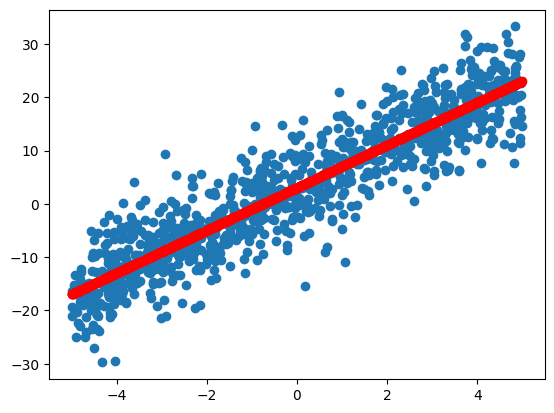

In [7]:
a,b,cost_list=regression(0,0,0.01,10000)
plt.figure()
plt.scatter(X,Y)
plt.scatter(X,Y_based_on_X(X,a,b),c='red')

In [ ]:
print(a,b)

3.9238158445232347 3.226830796348833


The cost function decreases steeply and then reaches it's minima(hence it becomes almost constant).. thus we've achieved our goal, we've minimised the cost function


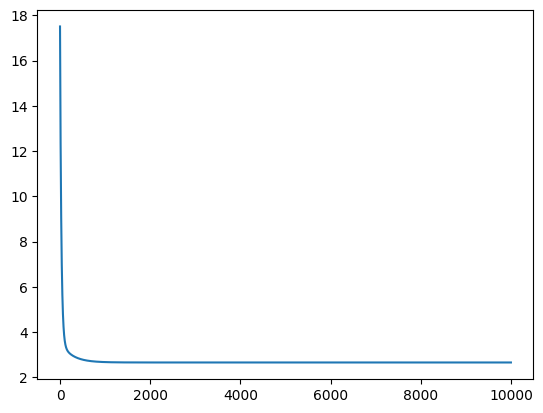

In [8]:
rng=np.arange(0,10000)
plt.figure()
plt.plot(rng,cost_list)  # showing how cost function decreases with every iteration.

In [40]:
#stochastic gradient descent
def stochastic(a,b,rate,m):
  b=np.random.random()
  a=np.random.random()
  costlist=[]
  for i in range(m):
    for i in range(n):
      id=np.random.randint(0,n)
      z=X[id]*a+b
      cost=(1/2)*np.sum((z-Y[id])**2)
      costlist.append(cost)
      grad_a=(2/n)*np.dot(X[id].T,(z-Y[id]))
      grad_b=(2/n)*(z-Y[id])
      a=a-rate*grad_a
      b=b-rate*grad_b

  return a,b,costlist

3.995152098304571 2.718400484781576


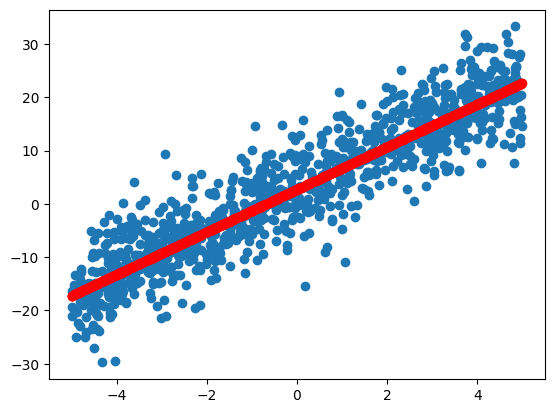

In [42]:
a,b,costlist=stochastic(0,0,0.01,100)
plt.figure()
plt.scatter(X,Y)
plt.scatter(X,Y_based_on_X(X,a,b),c='red')
print(a,b)

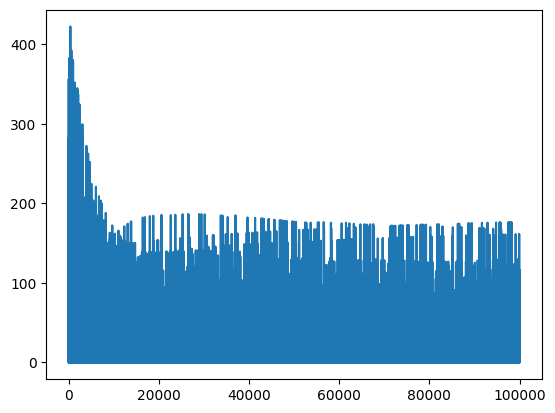

In [39]:
#variation of cost funtion with number of epochs
r=np.arange(0,100000)
plt.figure()
plt.plot(r,costlist)

In [43]:
# Closed form SOlution
X_0 = []
for i in range(len(X)):
  X_0.append((1,X[i]))
X = np.matrix(X_0)
Y = np.matrix(Y)
beta = (X.T*X).I*X.T*Y.T

beta

matrix([[3.0419646 ],
        [4.00421551]])